##### First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [261]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [262]:
#Importing the train dataset
df_train=pd.read_csv('C:\\Users\\Admin\\Desktop\\Malignant-Comments-Classifier\\Malignant Comments Classifier Project\\train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [263]:
#Importing the test dataset
#test_csv has only two attributes except the target variable 'malignant' and their comment type
df_test=pd.read_csv('C:\\Users\\Admin\\Desktop\\Malignant-Comments-Classifier\\Malignant Comments Classifier Project\\test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


##### Now,I've uploaded the Train and test csv file's of MALIGNANT COMMENTS CLASSIFICATION Project Case and made a dataframe for the same.

##### In this dataset Our goal is to build a prototype of online hate and abuse comment classifier which can be used to classify the hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. Since the target variable 'malignant' is already in the form of categorical representation hence will use classification model to predict our test data later in this portion itself.

##### See,since two seperate csv files are given, one for training and other for testing hence will do the EDA,feature engineering and data cleansing all together so that my train and test dataframe have equal number of column's or attributes

### Exploratory Data Analysis

In [264]:
print(f'For Train dataset-')
print('\tTotal Row"s are',df_train.shape[0])
print('\tTotal Columns are',df_train.shape[1])
print('\tShape is',df_train.shape)

For Train dataset-
	Total Row"s are 159571
	Total Columns are 8
	Shape is (159571, 8)


In [265]:
print(f'For Test dataset-')
print('\tTotal Row"s are',df_test.shape[0])
print('\tTotal Columns are',df_test.shape[1])
print('\tShape is',df_test.shape)

For Test dataset-
	Total Row"s are 153164
	Total Columns are 2
	Shape is (153164, 2)


In [266]:
#two dimensional of train dataframe
df_train.ndim

2

In [267]:
#two dimensional of test dataframe
df_test.ndim

2

In [268]:
#Total datapoints in the train dataframe
df_train.size

1276568

In [269]:
#Total datapoints in the test dataframe
df_test.size

306328

In [270]:
#indexes of train datframe-
df_train.index

RangeIndex(start=0, stop=159571, step=1)

In [271]:
#indexes of test datframe-
df_test.index

RangeIndex(start=0, stop=153164, step=1)

In [272]:
#columns of the train dataframe are-
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [273]:
#columns of the test dataframe are-
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [274]:
#numeric columns of train dataset
df_train_numeric=df_train.select_dtypes(exclude='object')
df_train_numeric

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [275]:
#Categorical columns of train dataset
df_train_categorical=df_train.select_dtypes(include='object')
df_train_categorical

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."
...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ..."
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ..."
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...


In [276]:
#importing the below library to find out all the numeric as well categorical attributes present in the train dataframe
import sklearn
from sklearn.compose import make_column_selector as selector
numeric_columns=selector(dtype_exclude=object)(df_train)
numeric_columns

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [277]:
len(numeric_columns)

6

In [278]:
categorical_columns=selector(dtype_include=object)(df_train)
categorical_columns

['id', 'comment_text']

In [279]:
len(categorical_columns)

2

##### As,we can see that in test dataset there are only two attributes are given and they are- id and comments; hence later on while building the model we've to keep in the mind that only these two attributes are necessary while going for model building as test and train dataset must have same attributes except our target variable 'malignant' 

In [280]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [281]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [282]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [283]:
#Checking for null values in train dataset
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [284]:
#Checking for null values in test dataset
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

##### No null values are present in train and test datasets

In [285]:
df_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

###### As we can see that the comments type has only two categories

In [286]:
df_test.nunique()

id              153164
comment_text    153164
dtype: int64

### Data Visualization
### 1.Histogram


The Histogram Diagram for the attribute "malignant" is
 AxesSubplot(0.125,0.125;0.775x0.755)


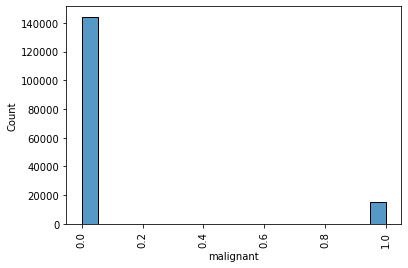




The Histogram Diagram for the attribute "highly_malignant" is
 AxesSubplot(0.125,0.125;0.775x0.755)


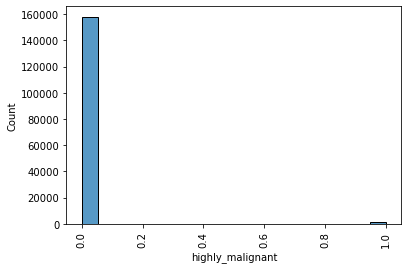




The Histogram Diagram for the attribute "rude" is
 AxesSubplot(0.125,0.125;0.775x0.755)


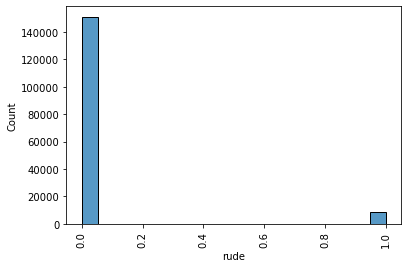




The Histogram Diagram for the attribute "threat" is
 AxesSubplot(0.125,0.125;0.775x0.755)


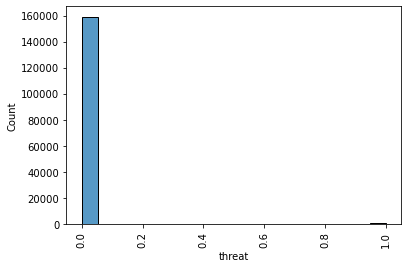




The Histogram Diagram for the attribute "abuse" is
 AxesSubplot(0.125,0.125;0.775x0.755)


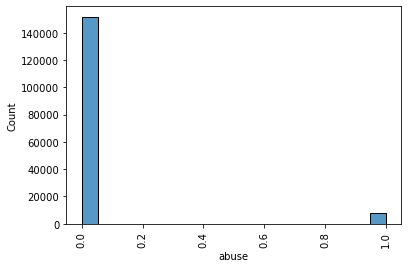




The Histogram Diagram for the attribute "loathe" is
 AxesSubplot(0.125,0.125;0.775x0.755)


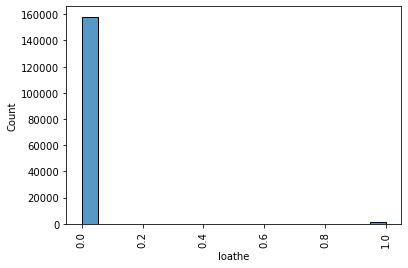

In [31]:
for i in df_train.columns.drop(['id','comment_text']):
    print(f'\nThe Histogram Diagram for the attribute "{i}" is\n {sns.histplot(df_train[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 2.Countplot

The Value Counts for the attribute "malignant" is
 0    144277
1     15294
Name: malignant, dtype: int64

The CountPlot Diagram for the attribute "malignant" is
 AxesSubplot(0.125,0.125;0.775x0.755)


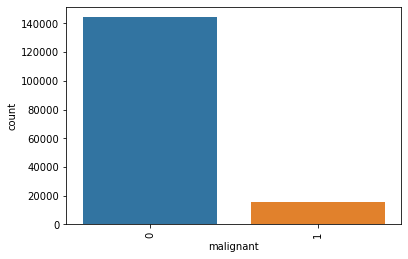



The Value Counts for the attribute "highly_malignant" is
 0    157976
1      1595
Name: highly_malignant, dtype: int64

The CountPlot Diagram for the attribute "highly_malignant" is
 AxesSubplot(0.125,0.125;0.775x0.755)


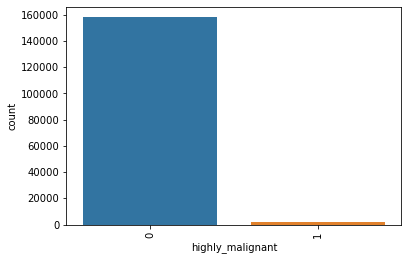



The Value Counts for the attribute "rude" is
 0    151122
1      8449
Name: rude, dtype: int64

The CountPlot Diagram for the attribute "rude" is
 AxesSubplot(0.125,0.125;0.775x0.755)


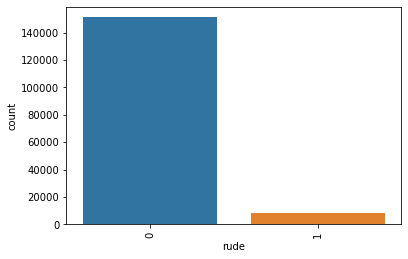



The Value Counts for the attribute "threat" is
 0    159093
1       478
Name: threat, dtype: int64

The CountPlot Diagram for the attribute "threat" is
 AxesSubplot(0.125,0.125;0.775x0.755)


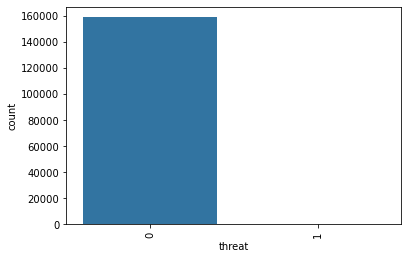



The Value Counts for the attribute "abuse" is
 0    151694
1      7877
Name: abuse, dtype: int64

The CountPlot Diagram for the attribute "abuse" is
 AxesSubplot(0.125,0.125;0.775x0.755)


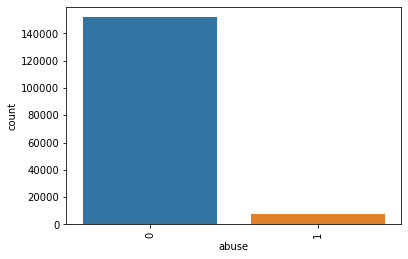



The Value Counts for the attribute "loathe" is
 0    158166
1      1405
Name: loathe, dtype: int64

The CountPlot Diagram for the attribute "loathe" is
 AxesSubplot(0.125,0.125;0.775x0.755)


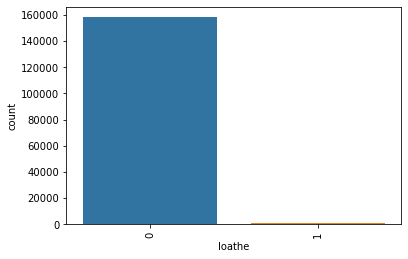

In [32]:
for i in df_train.columns.drop(['id','comment_text']):
    print(f'The Value Counts for the attribute "{i}" is\n {df_train[i].value_counts()}')
    print(f'\nThe CountPlot Diagram for the attribute "{i}" is\n {sns.countplot(df_train[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Explanation from the above Graphs-

Out of 159571 comments only 15294 comments are malignant.

Out of 159571 comments only 1595 comments are highly_malignant.

Out of 159571 comments only 8449 comments are rude.

Out of 159571 comments only 478 comments are threat.

Out of 159571 comments only 7877 comments are abuse.

Out of 159571 comments only 1405 comments are loathe.

Also there are 159571 unique id's and comment texts are recorded in this datasets.

### 3.Scatter Plot

The Scatter Plot for the attribute "malignant" & "malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


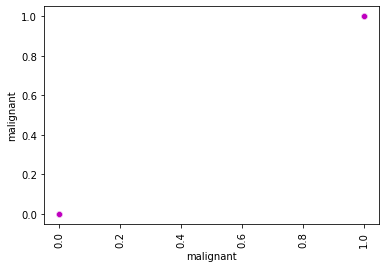



The Scatter Plot for the attribute "malignant" & "highly_malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


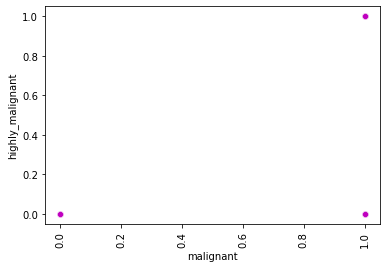



The Scatter Plot for the attribute "malignant" & "rude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


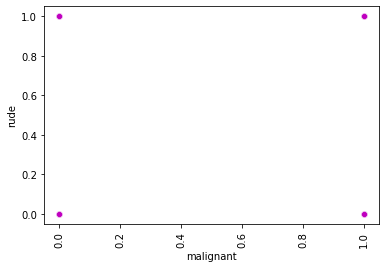



The Scatter Plot for the attribute "malignant" & "threat" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


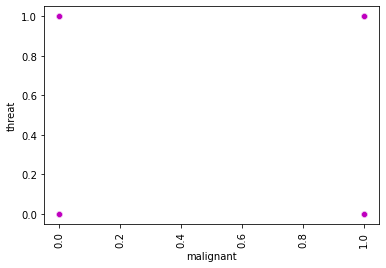



The Scatter Plot for the attribute "malignant" & "abuse" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


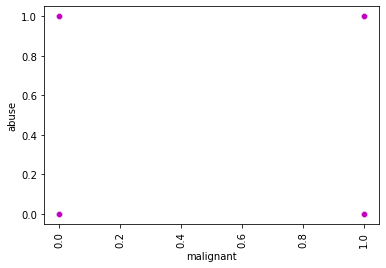



The Scatter Plot for the attribute "malignant" & "loathe" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


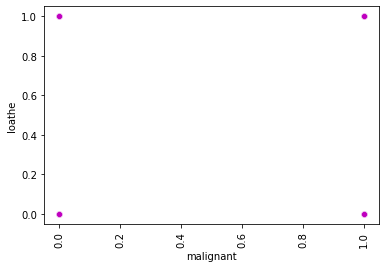

In [33]:
for i in df_train.columns.drop(['id','comment_text']):
    print(f'The Scatter Plot for the attribute "malignant" & "{i}" is-\n {sns.scatterplot(df_train["malignant"],df_train[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### The data is distributed among 0 and 1 for each attributes and distribution of 1 is highest for each of the attributes and since the distribution is b/w 0-1 hence there is no outliers presence is there.

### 4.Categorical Plot

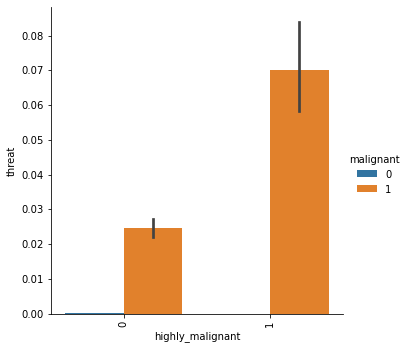

In [34]:
sns.catplot(x='highly_malignant',y='threat',hue='malignant',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

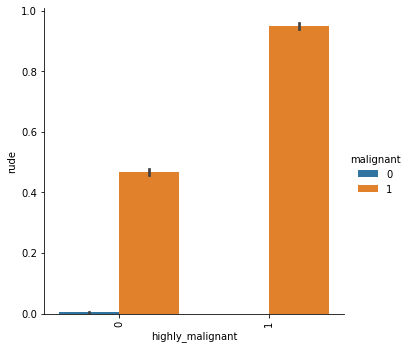

In [35]:
sns.catplot(x='highly_malignant',y='rude',hue='malignant',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

### Performed Some Queries

In [128]:
df_train[df_train['malignant']==1]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


##### Total 15294 comments are malignant

In [129]:
df_train[(df_train['malignant']==1) & (df_train['highly_malignant']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159096,f871b05d4caa6f20,"You filthy, stinking crow! \n\nI am back! Dirt...",1,1,1,0,1,0
159099,f885a3e2d779342e,now\n\nyou fucking pathetic moron. \n\ncc: Ji...,1,1,1,0,1,0
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how...,1,1,1,0,1,1
159312,fbf20e312cd4a78d,"Walter Mercado \n\nAntonio, quite frankly, you...",1,1,1,0,1,0


##### 1595 malingnant comments are highly malingnant.

In [130]:
df_train[(df_train['malignant']==1) & (df_train['rude']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0


##### 7926 malingnant comments are rude.

In [131]:
df_train[(df_train['malignant']==1) & (df_train['threat']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1,0,1,1,1,0
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
157718,e26b106943e02cbf,bitch \nyou are a fucking hore. you suck dick ...,1,0,1,1,1,1
158717,f264b7fb9a4b4f53,stupid head \n\nYOur dumb and you are stupid d...,1,0,1,1,1,0
158856,f4dca9e513e0366f,"Hey \n\nhey faggot, are you dead yet? or are y...",1,1,1,1,1,0
159029,f780e4f42aa5a344,Death to Musulmans!,1,0,0,1,0,1


##### 449 malingnant comments are threat.

In [132]:
df_train[(df_train['malignant']==1) & (df_train['abuse']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


##### 7344 malingnant comments are abusive.

In [133]:
df_train[(df_train['malignant']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how...,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,"Oh, fuck off. The pansy Jew would just whine a...",1,0,1,0,1,1
159400,fd052883fa6a8697,"Shalom \n\nSemite, get the fuck out of here. I...",1,1,1,1,1,1
159449,fdce660ddcd6d7ca,I think he is a gay fag!!!,1,0,0,0,0,1


##### 1302 malingnant comments are loathe.

In [134]:
df_train[(df_train['highly_malignant']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1116,03088aacc4600323,"Fuck you faggot, I don't care if i get blocked...",1,1,1,0,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
2359,065675c12e22e3e1,You fascit Nazi! You socialist bastard! You fi...,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
157428,ddf6dc5cf6931f48,Ok.... \n\nBitch i swear to God i will fuckin ...,1,1,1,1,1,1
158023,e778d4f09a32b559,"Fuck You \n\nNigga, fuck you.\n\nFlocka aint a...",1,1,1,0,1,1
158498,eee236660953137a,n ig ger nig ger \n\nHi n i g g e r,1,1,1,0,0,1
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how...,1,1,1,0,1,1


##### 313 highly malignant comments are loathe

In [135]:
df_train[(df_train['rude']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159041,f79a44cb4a4d17a8,"""\nARE YOU FUCKING RETARDED?\n\nPlease do not ...",1,0,1,0,1,1
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how...,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,"Oh, fuck off. The pansy Jew would just whine a...",1,0,1,0,1,1
159400,fd052883fa6a8697,"Shalom \n\nSemite, get the fuck out of here. I...",1,1,1,1,1,1


##### 1032 rude comments are loathe

In [136]:
df_train[(df_train['abuse']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159041,f79a44cb4a4d17a8,"""\nARE YOU FUCKING RETARDED?\n\nPlease do not ...",1,0,1,0,1,1
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how...,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,"Oh, fuck off. The pansy Jew would just whine a...",1,0,1,0,1,1
159400,fd052883fa6a8697,"Shalom \n\nSemite, get the fuck out of here. I...",1,1,1,1,1,1


##### 1160 abusive comments are loathe

In [137]:
df_train[(df_train['threat']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
1535,0420f5f4e950566b,Demonte Morton \n\nU bastard stop deletin' my ...,1,0,1,1,1,1
1878,0512f33cf8807fa2,Aaron Swartz \n\nStop fucking reverting my god...,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...
157010,d70546ae47ad8b67,of killing all the jews,1,0,0,1,0,1
157428,ddf6dc5cf6931f48,Ok.... \n\nBitch i swear to God i will fuckin ...,1,1,1,1,1,1
157718,e26b106943e02cbf,bitch \nyou are a fucking hore. you suck dick ...,1,0,1,1,1,1
159029,f780e4f42aa5a344,Death to Musulmans!,1,0,0,1,0,1


##### 98 threat comments are loathe comments

In [138]:
#checking all type of malignant presence in the dataset
df_train[(df_train['malignant']==1) & (df_train['highly_malignant']==1) & (df_train['rude']==1) & (df_train['threat']==1) & (df_train['abuse']==1) & (df_train['loathe']==1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
7299,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1
13648,2405c66d017f139e,Bitch \n\nYou are a little bitch. I fuckin spe...,1,1,1,1,1,1
13964,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1
22158,3a704e2efa9fa300,FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...,1,1,1,1,1,1
29968,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1
32098,554a87fb67e51344,Fuck All Asyriac Nation \n\nQamishli belong to...,1,1,1,1,1,1
33951,5a8eab9cfe601d3a,GO FUCK YOURSELF BITCH. I HATE YOUR SOULD. M...,1,1,1,1,1,1
38513,66c3bced1735cb90,AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...,1,1,1,1,1,1


In [139]:
print('\nTotal rows are',len(df_train[(df_train['malignant']==1) & (df_train['highly_malignant']==1) & (df_train['rude']==1) & (df_train['threat']==1) & (df_train['abuse']==1) & (df_train['loathe']==1)]))


Total rows are 31


##### There are total 31 comments which are malignant, highly_malignant, rude, threat, abusive and loathe all together

In [140]:
df_train[(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


##### There are total 143346 comments which are not malignant, not highly_malignant, not rude, not threat, not abusive and not loathe all together

In [141]:
a=df_train.drop(['id','comment_text'],axis=1)
a.value_counts()


malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0         143346
1          0                 0     0       0      0           5666
                             1     0       1      0           3800
                                           0      0           1758
                             0     0       1      0           1215
           1                 1     0       1      0            989
           0                 1     0       1      1            618
0          0                 1     0       0      0            317
                             0     0       1      0            301
1          1                 1     0       1      1            265
0          0                 1     0       1      0            181
1          1                 1     0       0      0            158
           0                 0     0       0      1            136
                                           1      1            134
     

##### From the above query we can analyse that-

out of 159571, 5666 comments are classified as malignant but these comments are neither highly_malignant, neither rude, neither threat, neither abusive & nor loathe.

3800 comments are rude and abusive both.

1758 comments are neither abusive nor loathe 

1215 comments are only abusive comments

989 comments are highly malignant as they are abusive and rude both.

618 comments are not highly malignant but they are abusive, rude and loathe all together.

317 comments those are not malignant are of rude type.

134 comments are abusive and loathe both.

56 comments are not highly malignant but they are rude,abusive,loathe and threat all together.

41 comments are not rude,abusive,loathe and threat all together but they are malignant and highly malignant comments.


### Encoding
##### Now I'll convert all the categorical columns of train as well as test datset into numeric one by applying label encoder technique
### Label Encoder in train dataset

In [287]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [288]:
for j in categorical_columns:
    df_train[j]=LabelEncoder().fit_transform(df_train[j].astype(str))

In [289]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0,0
1,1,68359,0,0,0,0,0,0
2,2,79594,0,0,0,0,0,0
3,4,35519,0,0,0,0,0,0
4,5,146426,0,0,0,0,0,0


In [290]:
df_train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,159505,44289,0,0,0,0,0,0
159567,159510,145720,0,0,0,0,0,0
159568,159524,122203,0,0,0,0,0,0
159569,159535,60037,0,0,0,0,0,0
159570,159541,31106,0,0,0,0,0,0


### Label Encoder in test dataset

In [291]:
categorical_test_columns=selector(dtype_include=object)(df_test)

In [292]:
for j in categorical_test_columns:
    df_test[j]=LabelEncoder().fit_transform(df_test[j].astype(str))

In [293]:
df_test.head()

,id,comment_text
0,0,139489
1,1,82945
2,2,15380
3,3,71743
4,4,116535


In [294]:
df_test.tail()

,id,comment_text
153159,153159,51845
153160,153160,93347
153161,153161,13499
153162,153162,8042
153163,153163,30249


### 5.ViolinPlot

The Violin-Plot for the attribute "id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


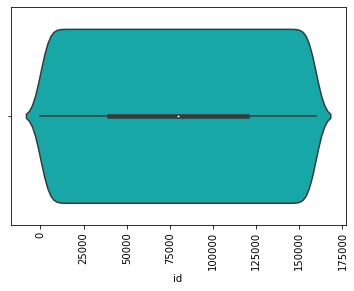



The Violin-Plot for the attribute "comment_text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


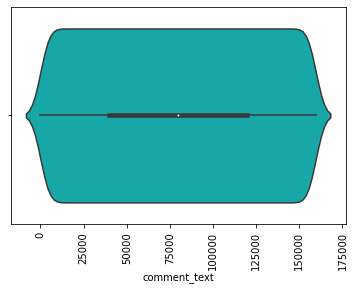



The Violin-Plot for the attribute "malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


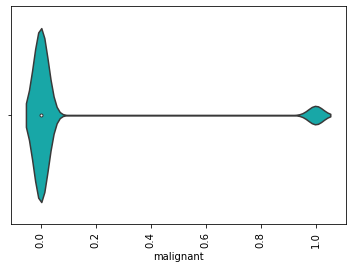



The Violin-Plot for the attribute "highly_malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


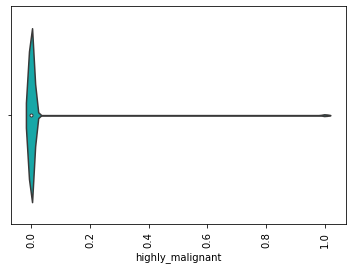



The Violin-Plot for the attribute "rude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


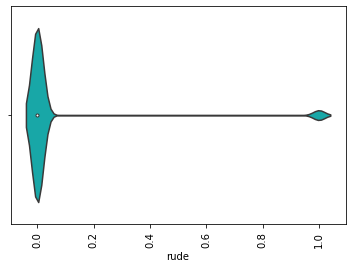



The Violin-Plot for the attribute "threat" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


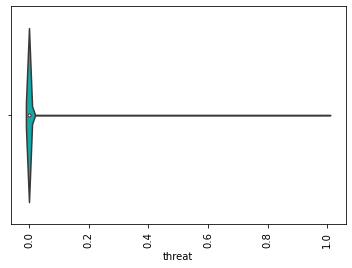



The Violin-Plot for the attribute "abuse" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


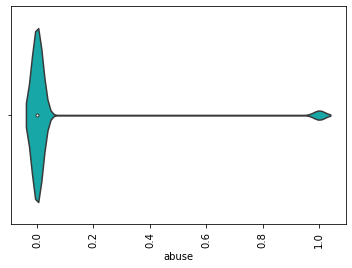



The Violin-Plot for the attribute "loathe" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


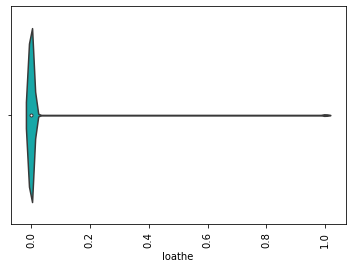

In [76]:
for i in df_train.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df_train[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 6.Pairplot

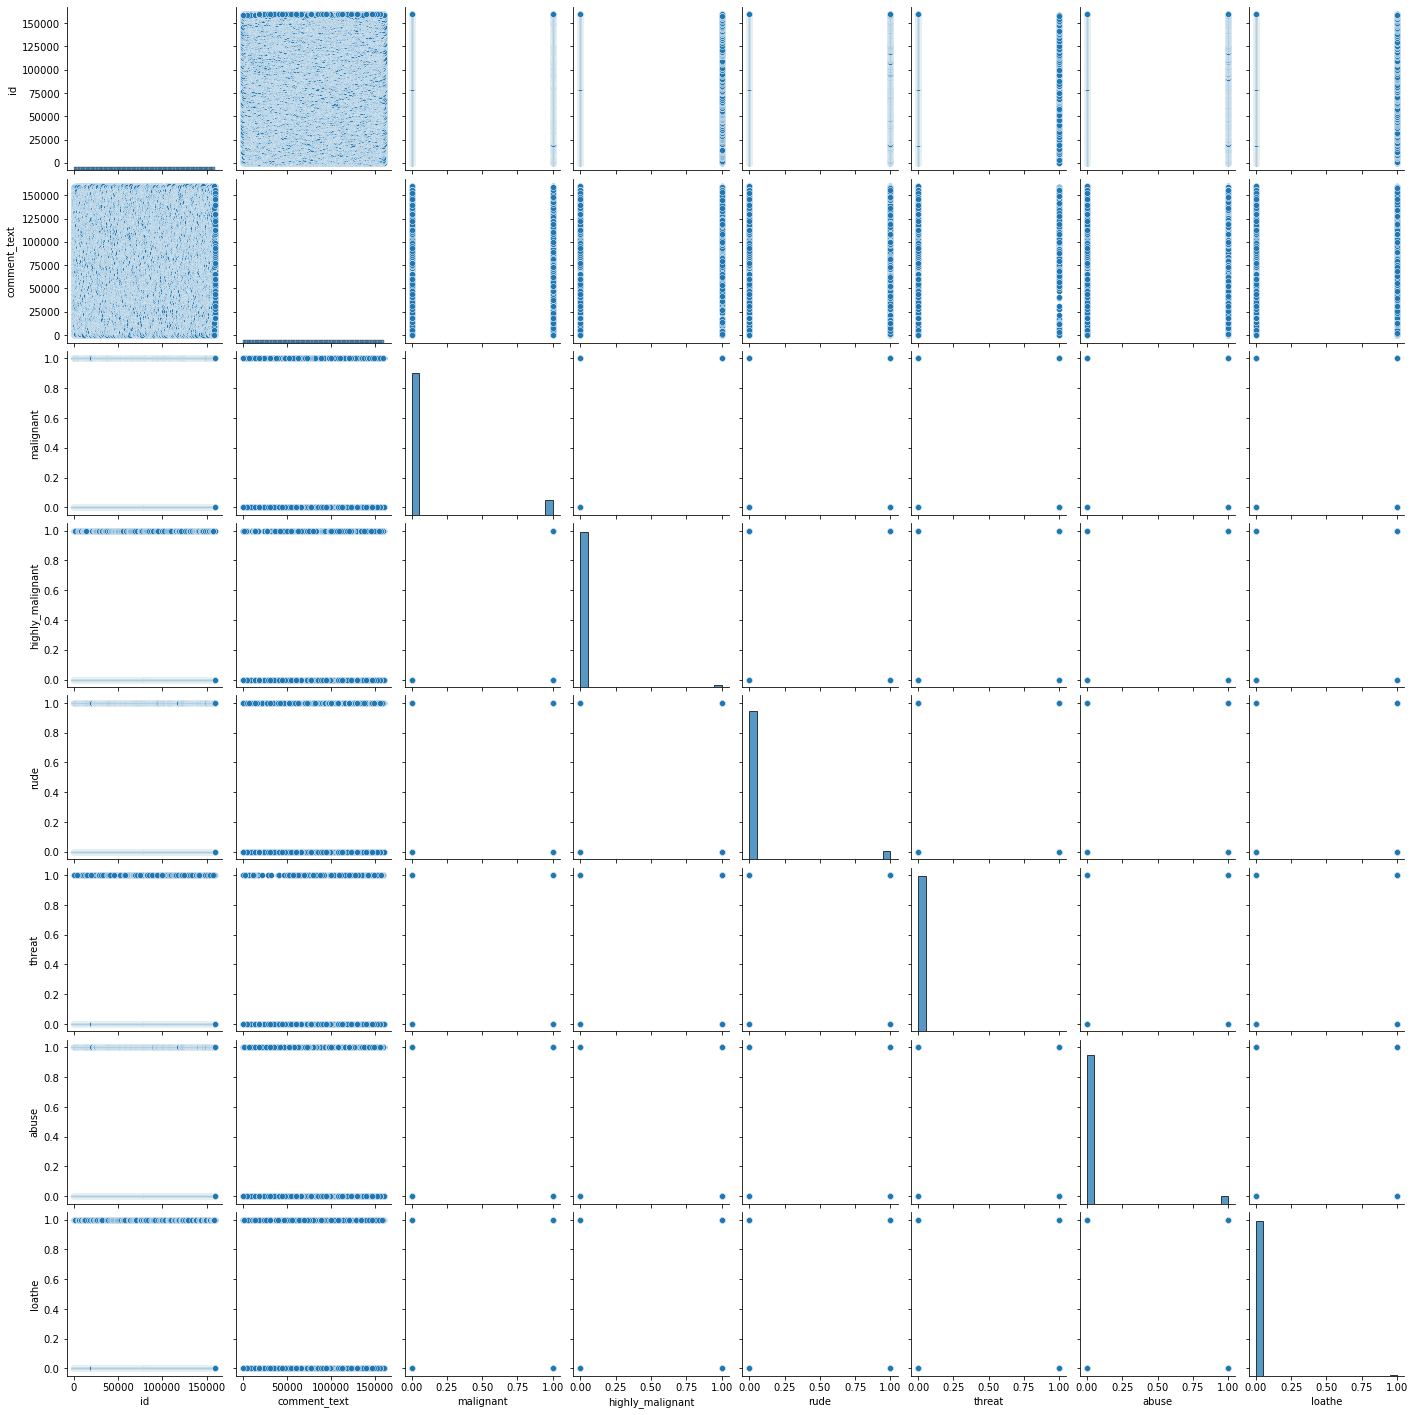

In [78]:
sns.pairplot(df_train)
plt.show()

### Descriptive Statistics

In [150]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159571.0,79785.000000,46064.324240,0.0,39892.5,79785.0,119677.5,159570.0
comment_text,159571.0,79785.000000,46064.324240,0.0,39892.5,79785.0,119677.5,159570.0
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [151]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,153164.0,76581.5,44214.782652,0.0,38290.75,76581.5,114872.25,153163.0
comment_text,153164.0,76581.5,44214.782652,0.0,38290.75,76581.5,114872.25,153163.0


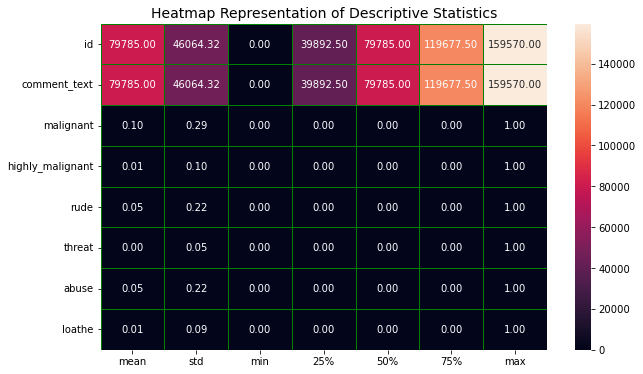

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

### Correlation

In [152]:
df_train.corr().malignant.sort_values()

id                 -0.003263
comment_text        0.132016
threat              0.157058
loathe              0.266009
highly_malignant    0.308619
abuse               0.647518
rude                0.676515
malignant           1.000000
Name: malignant, dtype: float64

As we can see that attribute 'id' is almost zero correlated w.r.t. our target variable hence we can delete this attribute from our train dataset and test dataset as well but as there are less variables given so will not delete it here and will convert these seven attributes into one or two variables w.r.t. PCA technique going further as these information could be useful.

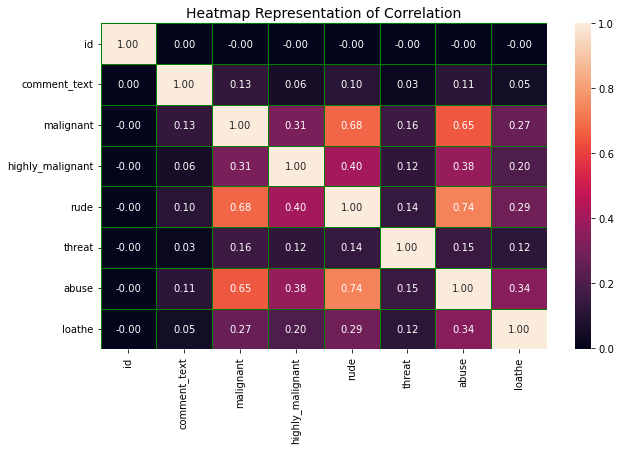

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

Variables Rude and Abuse are highly correlated with each other about 74%. Also Variables Rude and abuse are highly correlated w.r.t. our target variable 'Malignant' as 68% and 65% respectively. Variable Id is zero percent correlated w.r.t. target variable

### Multicollinearity

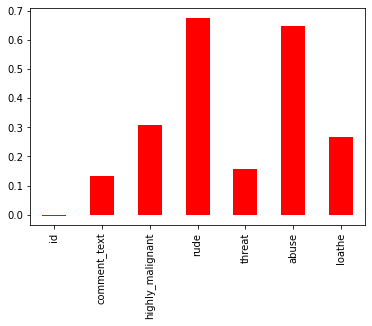

In [52]:
df_train.corr()['malignant'].drop(['malignant']).plot(kind='bar',color='r')
plt.show()

i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

### Skewness

In [154]:
df_train.skew().sort_values()

comment_text        1.282301e-19
id                  7.386055e-17
malignant           2.745854e+00
rude                3.992817e+00
abuse               4.160540e+00
highly_malignant    9.851722e+00
loathe              1.051592e+01
threat              1.818900e+01
dtype: float64

### Distribution Plot
##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute "id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


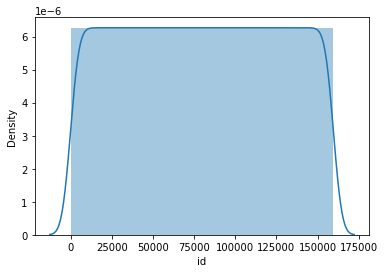



The Distribution Plot for attribute "comment_text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


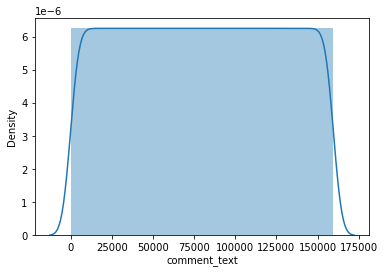



The Distribution Plot for attribute "malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


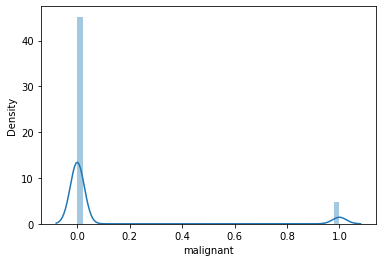



The Distribution Plot for attribute "highly_malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


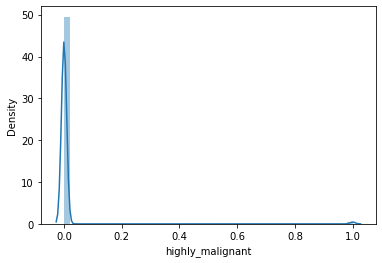



The Distribution Plot for attribute "rude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


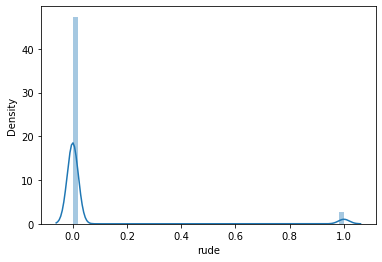



The Distribution Plot for attribute "threat" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


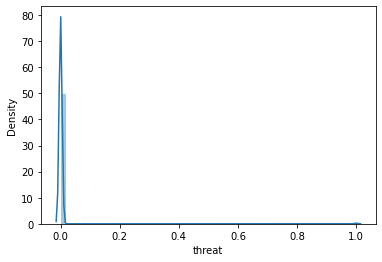



The Distribution Plot for attribute "abuse" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


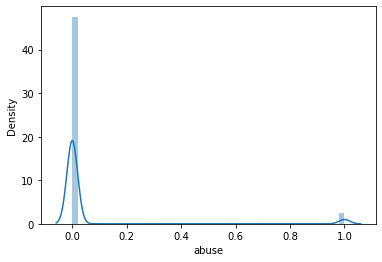



The Distribution Plot for attribute "loathe" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


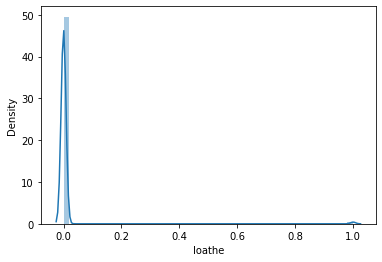

In [90]:
for i in df_train.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df_train[i])}')
    plt.show()
    print('\n')

Almost most of the distribution is normally distribution and for the variable id and comment_text the varaince is more

### Outliers

In [295]:
z=np.abs(zscore(df_train))
np.where(z>3)

(array([     6,      6,      6, ..., 159554, 159554, 159554], dtype=int64),
 array([2, 3, 4, ..., 2, 4, 6], dtype=int64))

In [296]:
print(z.iloc[6,2])
print(z.iloc[6,3])
print(z.iloc[6,4])

3.071411519116151
9.952111037693612
4.229228899698583


In [297]:
z1=np.abs(zscore(df_test))
np.where(z1>3)

(array([], dtype=int64), array([], dtype=int64))

### Boxplots To check the Outliers

The Box-Plot for attribute "id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


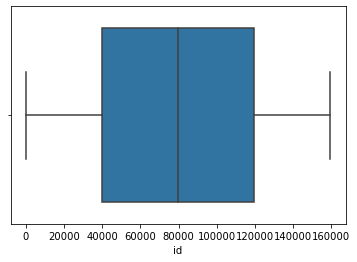



The Box-Plot for attribute "comment_text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


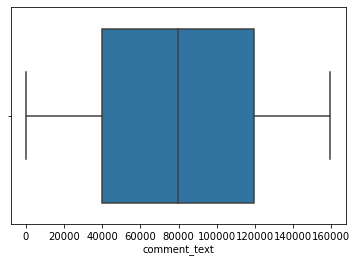



The Box-Plot for attribute "malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


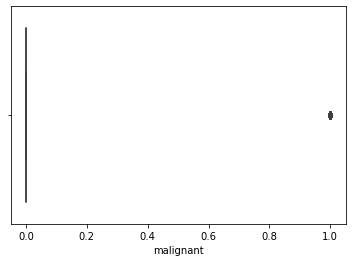



The Box-Plot for attribute "highly_malignant" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


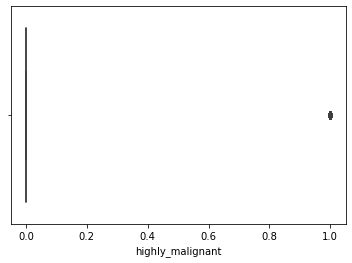



The Box-Plot for attribute "rude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


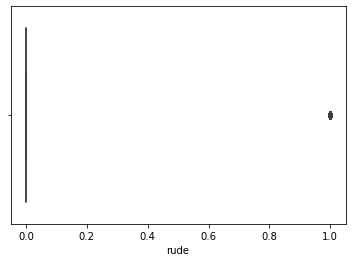



The Box-Plot for attribute "threat" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


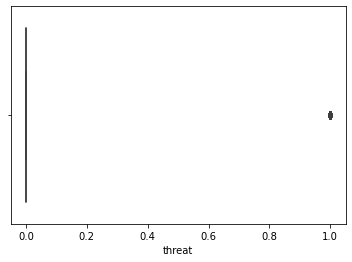



The Box-Plot for attribute "abuse" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


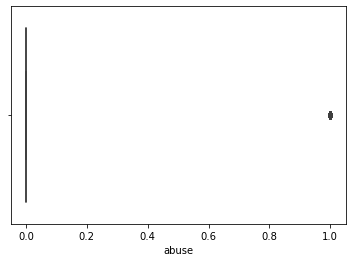



The Box-Plot for attribute "loathe" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


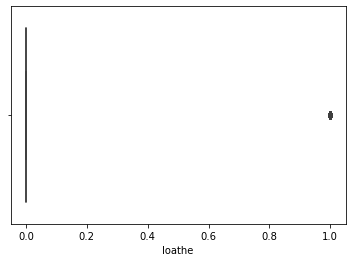

In [164]:
for i in df_train.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df_train[i])}')
    plt.show()
    print('\n')

### Data Cleansing
### 1. Remove Negative Correlation

As we can see that attribute 'id' is almost zero correlated w.r.t. our target variable hence we can delete this attribute from our train dataset and test dataset as well but as there are less variables given so will not delete it here and will convert these seven attributes into one or two variables w.r.t. PCA technique going further as these information could be useful.
Will Use PCA technique for the curse of the dimension removal.

### 2.Removing Multicollinearity

In [298]:
x=df_train.drop('malignant',axis=1)
x

,id,comment_text,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0
1,1,68359,0,0,0,0,0
2,2,79594,0,0,0,0,0
3,4,35519,0,0,0,0,0
4,5,146426,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,159505,44289,0,0,0,0,0
159567,159510,145720,0,0,0,0,0
159568,159524,122203,0,0,0,0,0
159569,159535,60037,0,0,0,0,0


In [299]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [301]:
vif()

           Features  VIF_Score
0                id   2.292034
1      comment_text   2.359035
2  highly_malignant   1.236950
3              rude   2.448829
4            threat   1.036712
5             abuse   2.467052
6            loathe   1.153683


No variables are highly correlated with respect to each other by more than 80%.Hence will not drop any variable.

### 3.Removing Outliers

We'll not be removing any outliers in train dataset as outliers are not present in the dataset as the data distribution is in b/w 0-1,so will skip this part. Also, will not remove any outliers in test data as well.

### 4.Removing Skewness for train as well as test dataset
### Using PowerTransformer method

In [302]:
#train
x=df_train.drop(['malignant'],axis=1)
x

,id,comment_text,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0
1,1,68359,0,0,0,0,0
2,2,79594,0,0,0,0,0
3,4,35519,0,0,0,0,0
4,5,146426,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,159505,44289,0,0,0,0,0
159567,159510,145720,0,0,0,0,0
159568,159524,122203,0,0,0,0,0
159569,159535,60037,0,0,0,0,0


In [303]:
from sklearn.preprocessing import PowerTransformer

In [304]:
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x

array([[-2.1965229 , -0.04590477, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19602627, -0.13752042, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19560067,  0.09647909, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       ...,
       [ 1.55302692,  0.90884561, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55320978, -0.31817882, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55330953, -1.01693553, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005]])

### Using Standard Scaler

In [305]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [306]:
x_train=sc.fit_transform(x)
x_train

array([[-2.1965229 , -0.04590477, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19602627, -0.13752042, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [-2.19560067,  0.09647909, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       ...,
       [ 1.55302692,  0.90884561, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55320978, -0.31817882, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005],
       [ 1.55330953, -1.01693553, -0.10048119, ..., -0.05481361,
        -0.22787476, -0.09425005]])

For the train dataset-
	The mean is  -1.510463972653783e-17
	The Std. is  1.0000000000000002

	The distribution plot is- AxesSubplot(0.125,0.125;0.775x0.755)


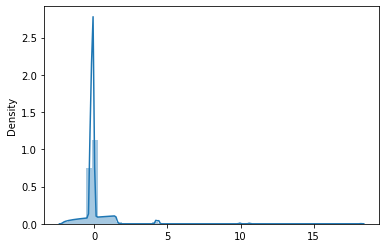

In [307]:
print('For the train dataset-')
print('\tThe mean is ',x_train.mean())
print('\tThe Std. is ',x_train.std())
print('\n\tThe distribution plot is-',sns.distplot(x_train))

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

### For Test Dataset

In [308]:
pt=PowerTransformer(method='yeo-johnson')
x1=pt.fit_transform(df_test)
x1


array([[-2.19649774,  1.31375785],
       [-2.19598652,  0.23379223],
       [-2.19554841, -1.458881  ],
       ...,
       [ 1.55375759, -1.52394791],
       [ 1.5537749 , -1.73043364],
       [ 1.55379222, -1.00599921]])

In [309]:
x_test=sc.fit_transform(x1)
x_test

array([[-2.19649774,  1.31375785],
       [-2.19598652,  0.23379223],
       [-2.19554841, -1.458881  ],
       ...,
       [ 1.55375759, -1.52394791],
       [ 1.5537749 , -1.73043364],
       [ 1.55379222, -1.00599921]])

For the test dataset-
	The mean is  3.197497980090942e-17
	The Std. is  1.0

	The distribution plot is- AxesSubplot(0.125,0.125;0.775x0.755)


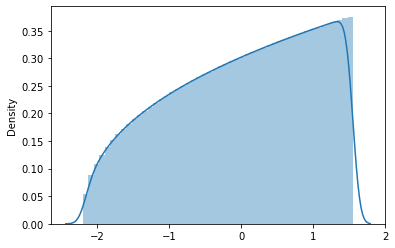

In [310]:
print('For the test dataset-')
print('\tThe mean is ',x_test.mean())
print('\tThe Std. is ',x_test.std())
print('\n\tThe distribution plot is-',sns.distplot(x_test))

### Using Principle Component Analysis(PCA) for Train and Test Dataset

In [311]:
from sklearn.decomposition import PCA

In [312]:
y_train=df_train['malignant']
y_train

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64

In [313]:
# in the train dataset I've converted all the seven features into two principle components
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_train

array([[-0.35011023,  2.1627832 ],
       [-0.36165387,  2.17838242],
       [-0.33217378,  2.13687399],
       ...,
       [-0.23870652, -1.6918041 ],
       [-0.39329712, -1.47652041],
       [-0.48133221, -1.35391794]])

### Plotting the Relationship b/w Principle Components

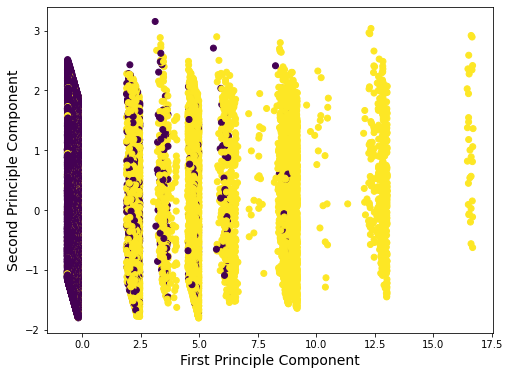

In [314]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0:1],x_train[:,1:2],c=y_train)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

Above diagram shows us that our feature variables are distributed and mixed well that's a good sign going forward

In [315]:
#for test dataset i've converted the two feature variables into two principle components as we need columns same as those of train dataset.
pca=PCA(n_components=2)
x_test=pca.fit_transform(x_test)
x_test

array([[ 2.48212553,  0.62419136],
       [ 1.71811303,  1.38748088],
       [ 0.52090252,  2.58407181],
       ...,
       [-2.17626642, -0.02107863],
       [-2.32228613,  0.12491659],
       [-1.81004588, -0.38734816]])

In [316]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(159571, 2)
(159571,)
(153164, 2)


### Using IMBlearn Balancing Techniques

##### To balance the class of target variable

In [317]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64

In [318]:
y_train.value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [100]:
!pip install -U imbalanced-learn

In [319]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [320]:
y_train.value_counts()

0    144277
1    144277
Name: malignant, dtype: int64

##### Now the dataset of our target variable is balanced

In [321]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(288554, 2)
(153164, 2)
(288554,)


### Training and Testing the Model's

In [322]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
lr=LogisticRegression()

In [323]:
lr.fit(x_train,y_train)           #training the model
train_pred=lr.predict(x_train)    #predicting the y_train
y_test=lr.predict(x_test)         #predicting the y_test
print(f'Training Accuracy of Logistic Regression model is {accuracy_score(train_pred,y_train)}')

Training Accuracy of Logistic Regression model is 0.8126208612599375


### Finding Out CV Score

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
for n in range(2,6):
    cvscore=cross_val_score(lr,x_train,y_train,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 81.14876245000936 and Standard Deviation is 0.00010396667521506142


At K-Fold 3 The CV Score of Linear Regression Model is 81.08880838275593 and Standard Deviation is 0.0002616101321453628


At K-Fold 4 The CV Score of Linear Regression Model is 81.11064153182166 and Standard Deviation is 0.000891653141935813


At K-Fold 5 The CV Score of Linear Regression Model is 81.1487626965139 and Standard Deviation is 0.0008784778820030656




We're getting the Cv Score as 81% which is really good accuracy; now let's try for some more models and check there CV Score and training accuracy first and then later on while making prediction on test dataset will findout testing accuracy score, f1-score and AUC_ROC Score for more clarification

In [324]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

In [190]:
#creating a definition to expand the model individually
def model(m):
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    y_test=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {round(accuracy_score(train_pred,y_train)*100,2)}')
    cvscore=cross_val_score(m,x_train,y_train,cv=6)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'\nAt K-Fold {2} The CV Score the Model "{m}" is {mean*100} and Standard Deviation is {std}')
    print('\n')    

In [191]:
model(gb)

Training Accuracy of model GaussianNB() is 81.15

At K-Fold 2 The CV Score the Model "GaussianNB()" is 81.14876146818261 and Standard Deviation is 0.001577902609951066




In [192]:
model(neighbor)

Training Accuracy of model KNeighborsClassifier() is 90.74

At K-Fold 2 The CV Score the Model "KNeighborsClassifier()" is 81.89040269954106 and Standard Deviation is 0.021055604391504435




In [193]:
model(dtc)

Training Accuracy of model DecisionTreeClassifier() is 100.0

At K-Fold 2 The CV Score the Model "DecisionTreeClassifier()" is 81.50225774792295 and Standard Deviation is 0.01390988551557446




In [194]:
model(rfc)

Training Accuracy of model RandomForestClassifier() is 100.0

At K-Fold 2 The CV Score the Model "RandomForestClassifier()" is 83.3927213078686 and Standard Deviation is 0.01771396525511442




In [195]:
model(ad)

Training Accuracy of model AdaBoostClassifier() is 81.18

At K-Fold 2 The CV Score the Model "AdaBoostClassifier()" is 79.17374915231325 and Standard Deviation is 0.01344553489669082




In [196]:
model(grd)

Training Accuracy of model GradientBoostingClassifier() is 81.24

At K-Fold 2 The CV Score the Model "GradientBoostingClassifier()" is 77.89461834032844 and Standard Deviation is 0.01926500541309675




We're almost getting same CV score for each model which is a good indication that our model is working well.

### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [197]:
from sklearn.model_selection import GridSearchCV

In [235]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [236]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x_train,y_train)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [237]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [238]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'best'}


In [239]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt'}


In [240]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [241]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'auto'}


In [198]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='log_loss',max_features='log2',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='gini',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential',max_features= 'auto')

In [199]:
model(gb)

Training Accuracy of model GaussianNB() is 81.15

At K-Fold 2 The CV Score the Model "GaussianNB()" is 81.14876146818261 and Standard Deviation is 0.001577902609951066




In [200]:
model(neighbor)

Training Accuracy of model KNeighborsClassifier(weights='distance') is 100.0

At K-Fold 2 The CV Score the Model "KNeighborsClassifier(weights='distance')" is 83.20176731708759 and Standard Deviation is 0.01880307144500057




In [201]:
model(dtc)

Training Accuracy of model DecisionTreeClassifier(criterion='log_loss', max_features='log2') is 100.0

At K-Fold 2 The CV Score the Model "DecisionTreeClassifier(criterion='log_loss', max_features='log2')" is 80.18395980885586 and Standard Deviation is 0.01308327243767059




In [202]:
model(rfc)

Training Accuracy of model RandomForestClassifier(class_weight='balanced') is 100.0

At K-Fold 2 The CV Score the Model "RandomForestClassifier(class_weight='balanced')" is 83.46064579400917 and Standard Deviation is 0.017567034436747276




In [203]:
model(ad)

Training Accuracy of model AdaBoostClassifier() is 81.18

At K-Fold 2 The CV Score the Model "AdaBoostClassifier()" is 79.17374915231325 and Standard Deviation is 0.01344553489669082




In [204]:
model(grd)

Training Accuracy of model GradientBoostingClassifier(loss='exponential', max_features='auto') is 81.2

At K-Fold 2 The CV Score the Model "GradientBoostingClassifier(loss='exponential', max_features='auto')" is 77.9150662054928 and Standard Deviation is 0.019348536434202805




### Saving the Best Model
### 1st Model (Random Forest Classifier)

In [205]:
import joblib
file='MalignantComment.obj'
joblib.dump(rfc,file)

['MalignantComment.obj']

### Loading the Model

In [206]:
A=joblib.load('MalignantComment.obj')
A

RandomForestClassifier(class_weight='balanced')

In [207]:
#prediction on x-test dataset
pred=A.predict(x_test)
pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [208]:
#Finding out the testing accuracy
accuracy=accuracy_score(pred,y_test)
accuracy

0.6221697004518033

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.5978023339386587


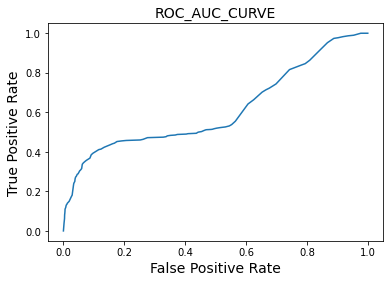

In [209]:
prob=A.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

In [210]:
print('\n Classification Report-\n',classification_report(y_test,pred))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred))


 Classification Report-
               precision    recall  f1-score   support

           0       0.67      0.72      0.70     91392
           1       0.54      0.47      0.50     61772

    accuracy                           0.62    153164
   macro avg       0.60      0.60      0.60    153164
weighted avg       0.62      0.62      0.62    153164


 Confusion Metrix-
 [[66150 25242]
 [32628 29144]]


In [211]:
conclusion=pd.DataFrame(data=[pred,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,1,1,0,1,1,1,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 2nd Model (Decision Tree Classifier)

In [212]:
import joblib
file='Malignant.obj'
joblib.dump(dtc,file)

['Malignant.obj']

In [213]:
B=joblib.load('Malignant.obj')
B

DecisionTreeClassifier(criterion='log_loss', max_features='log2')

In [214]:
predc=B.predict(x_test)
predc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [215]:
accuracy=accuracy_score(predc,y_test)
accuracy

0.6125656159410827

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.6377198020611308


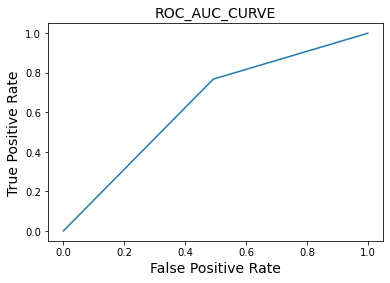

In [216]:
prob=B.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,predc)}')

In [217]:
print('\n Classification Report-\n',classification_report(y_test,predc))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,predc))


 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.51      0.61     91392
           1       0.51      0.77      0.62     61772

    accuracy                           0.61    153164
   macro avg       0.64      0.64      0.61    153164
weighted avg       0.66      0.61      0.61    153164


 Confusion Metrix-
 [[46395 44997]
 [14344 47428]]


In [218]:
conclusion=pd.DataFrame(data=[predc,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,0,1,0,1,1,1,1,1,1,1,...,0,0,1,1,0,1,0,1,1,1
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 3rd Model (K Neighbors Classifier)

In [219]:
import joblib
file='Malignant_project.obj'
joblib.dump(neighbor,file)

['Malignant_project.obj']

In [220]:
C=joblib.load('Malignant_project.obj')
C

KNeighborsClassifier(weights='distance')

In [221]:
predcn=C.predict(x_test)
predcn

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
accuracy=accuracy_score(predcn,y_test)
accuracy

0.7277754563735603

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.6903163482416861


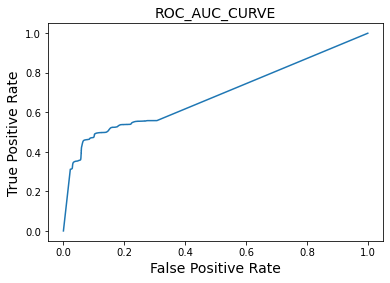

In [223]:
prob=C.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,predcn)}')

In [224]:
print('\n Classification Report-\n',classification_report(y_test,predcn))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,predcn))


 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.88      0.79     91392
           1       0.74      0.50      0.60     61772

    accuracy                           0.73    153164
   macro avg       0.73      0.69      0.70    153164
weighted avg       0.73      0.73      0.71    153164


 Confusion Metrix-
 [[80792 10600]
 [31095 30677]]


In [225]:
conclusion=pd.DataFrame(data=[predcn,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,0,0,0,0,0
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 4th Model (Gaussian Naive-Bayes)

In [226]:
import joblib
file='Malignant_p.obj'
joblib.dump(gb,file)

['Malignant_p.obj']

In [227]:
D=joblib.load('Malignant_p.obj')
D

GaussianNB()

In [228]:
predcnn=D.predict(x_test)
predcnn

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [342]:
predicted_y=pd.DataFrame(predcnn,columns=['Predictions']).to_csv('predicted_y.csv')

In [229]:
accuracy=accuracy_score(predcnn,y_test)
accuracy

0.800253323235225

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.8077396951767012


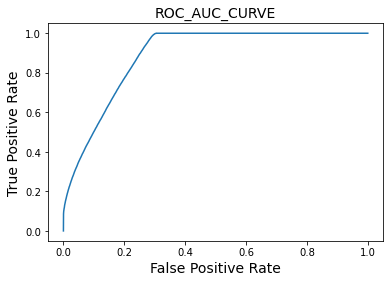

In [230]:
prob=D.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,predcnn)}')

In [231]:
print('\n Classification Report-\n',classification_report(y_test,predcnn))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,predcnn))


 Classification Report-
               precision    recall  f1-score   support

           0       0.88      0.77      0.82     91392
           1       0.71      0.85      0.77     61772

    accuracy                           0.80    153164
   macro avg       0.80      0.81      0.80    153164
weighted avg       0.81      0.80      0.80    153164


 Confusion Metrix-
 [[70283 21109]
 [ 9485 52287]]


In [232]:
conclusion=pd.DataFrame(data=[predcnn,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,1,1,1
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 5th Model (Ada Boost Classifier)

In [233]:
import joblib
file='malignant.obj'
joblib.dump(ad,file)

['malignant.obj']

In [234]:
E=joblib.load('malignant.obj')
E

AdaBoostClassifier()

In [235]:
predcnnn=E.predict(x_test)
predcnnn

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [236]:
accuracy=accuracy_score(predcnnn,y_test)
accuracy

0.5231451254864067

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.5201421295303721


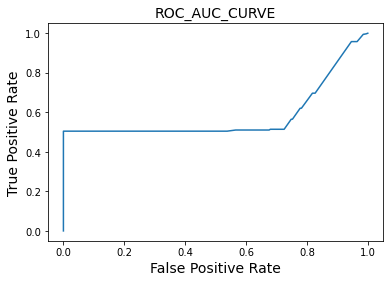

In [237]:
prob=E.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,predcnnn)}')

In [238]:
print('\n Classification Report-\n',classification_report(y_test,predcnnn))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,predcnnn))


 Classification Report-
               precision    recall  f1-score   support

           0       0.62      0.54      0.57     91392
           1       0.42      0.50      0.46     61772

    accuracy                           0.52    153164
   macro avg       0.52      0.52      0.52    153164
weighted avg       0.54      0.52      0.53    153164


 Confusion Metrix-
 [[48956 42436]
 [30601 31171]]


In [239]:
conclusion=pd.DataFrame(data=[predcnnn,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,1,1,0,1,1,1,1,1,1,1,...,0,1,1,1,0,1,1,1,1,1
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 6th Model (Gradient Boosting Classifier)

In [240]:
import joblib
file='Malignant.obj'
joblib.dump(grd,file)

['Malignant.obj']

In [241]:
F=joblib.load('Malignant.obj')
F

GradientBoostingClassifier(loss='exponential', max_features='auto')

In [242]:
pre=F.predict(x_test)
pre

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
accuracy=accuracy_score(pre,y_test)
accuracy

0.7878483194484344

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.7419503840821928


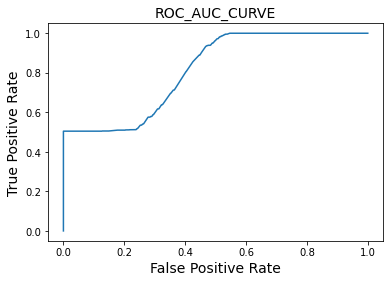

In [244]:
prob=F.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pre)}')

In [245]:
print('\n Classification Report-\n',classification_report(y_test,pre))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,pre))


 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.98      0.85     91392
           1       0.94      0.50      0.66     61772

    accuracy                           0.79    153164
   macro avg       0.84      0.74      0.75    153164
weighted avg       0.82      0.79      0.77    153164


 Confusion Metrix-
 [[89499  1893]
 [30601 31171]]


In [246]:
conclusion=pd.DataFrame(data=[pre,y_test],index=['Predicted Malignant','Original Malignant'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153154,153155,153156,153157,153158,153159,153160,153161,153162,153163
Predicted Malignant,1,1,0,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
Original Malignant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [340]:
df=pd.DataFrame({'Model_Name':['GaussianNB','GradientBoostingClassifier','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier'],'Rank':[1,2,3,4,5,6],'Accuracy_score_%':[80,79,73,62,61,52],'ROC_AUC_Score_%':[80,74,69,60,64,52],'F1_Score_%':[80,79,73,62,61,52]})
df

,Model_Name,Rank,Accuracy_score_%,ROC_AUC_Score_%,F1_Score_%
0,GaussianNB,1,80,80,80
1,GradientBoostingClassifier,2,79,74,79
2,KNeighborsClassifier,3,73,69,73
3,RandomForestClassifier,4,62,60,62
4,DecisionTreeClassifier,5,61,64,61
5,AdaBoostClassifier,6,52,52,52


##### As we can see above all the models, Gaussian Naive Bayes model seems perfect one as compare to all as the testing accuracy score is 80%, F1 score is 80% and auc_roc score is of 80% which is best as compare to other models,also the ROC AUC Score is 0.80 which is greater than 0.6 of threshold value and it indicates that out of 100 times,80 times model is predicting the right classes and it is still a great accuracy. As we can see in the conclusion portion we have got almost same value in prediction column as compare to original column. So we can say that this model has great accuracy in predicting the Malignant comments.